In [3]:
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load train data
filepath = r"C:\Users\Naim Rihan\Desktop/"
df_shopping_base = pd.read_csv(filepath + 'online_shoppers_intention.csv') 
df_shopping_base

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
# Changing target column name

df= df_shopping_base
df = df.rename(columns={'Revenue': 'impulsive'})

In [6]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,impulsive
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [8]:
# Replacing visitor_type to int
print(df['VisitorType'].unique())
df= df.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
monthlist = df['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df['Month'] =  mlist

# Delete records with NAs
df.dropna(inplace=True)

df.head()

[1 0 2]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,impulsive
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,True,False


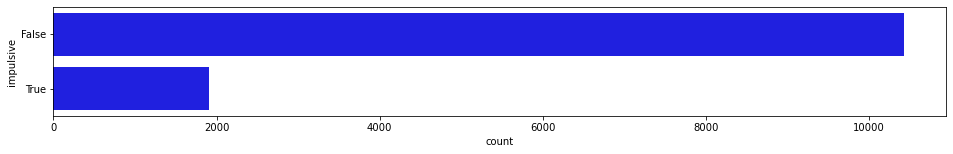

In [11]:
# Checking the balance of prediction labels
plt.figure(figsize=(16,2))
fig = sns.countplot(y="impulsive", data=df, color='b')
plt.show()

<AxesSubplot:>

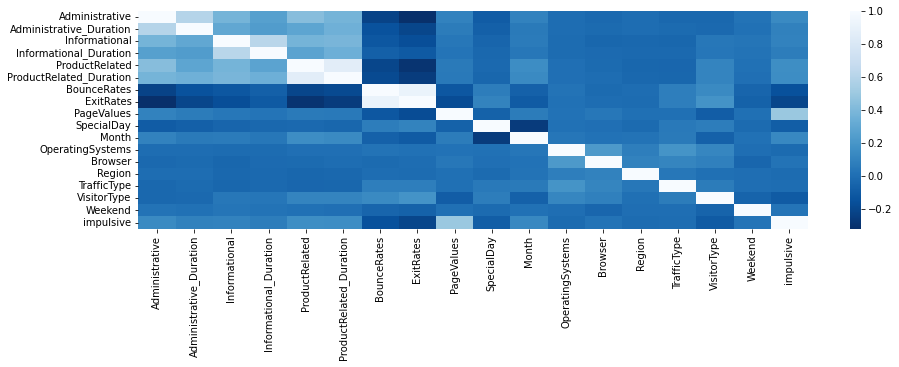

In [13]:
# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df.corr()
sns.heatmap(f_cor, cmap="Blues_r")

The correlation plot shows that some features are highly correlated. The following features are highly correlated:

ProductRelated and ProductRelated_Duration.
BounceRates and ExitRates

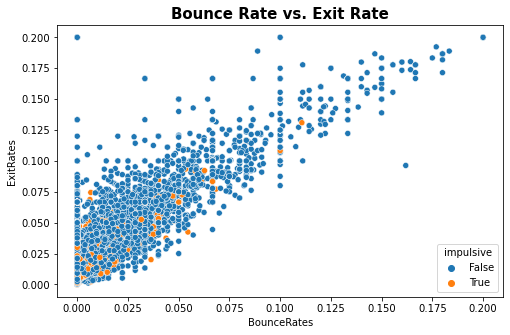

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='impulsive')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

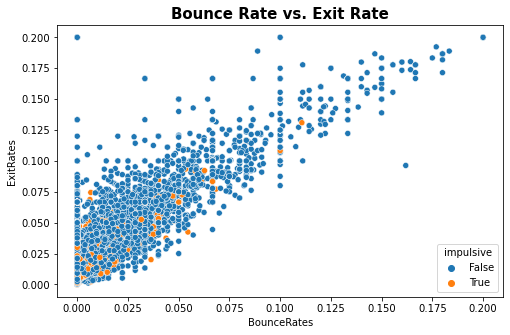

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='impulsive')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

In [18]:
# Separate labels from training data
features = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 
            'Month', 'Region', 'TrafficType', 'VisitorType']
X = df[features] #Training data
y = df['impulsive'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Scale the numeric values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Training a classification model using logistic regression 
logreg = LogisticRegression(solver='lbfgs')
score = logreg.fit(X_train, y_train).decision_function(X_test)

Text(0.5, 384.16, 'Predicted label')

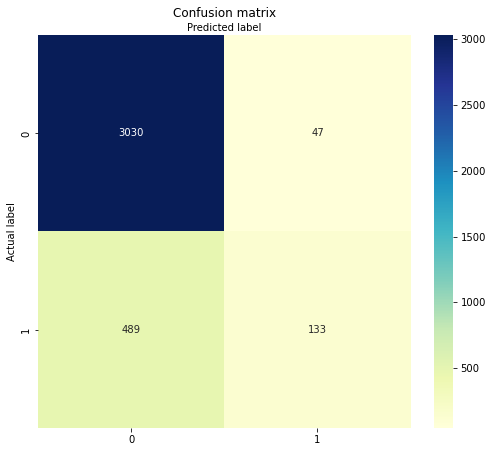

In [20]:
# create a confusion matrix
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# create heatmap
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.86
Precision: 0.74
Recall: 0.21
f1_score: 0.33


In [22]:
from sklearn.neural_network import MLPClassifier

In [24]:
MLP = MLPClassifier()
score = MLP.fit(X_train, y_train)

C:\Users\Naim Rihan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# create a confusion matrix
y_pred = MLP.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 384.16, 'Predicted label')

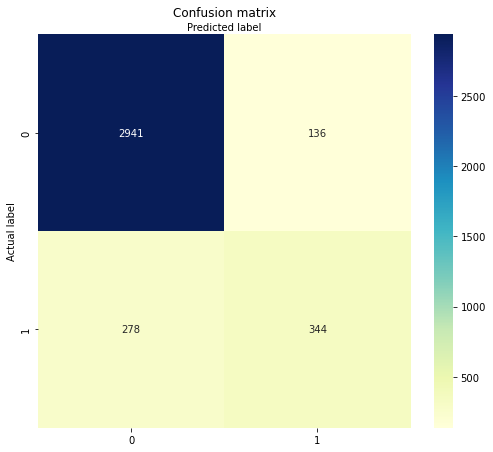

In [26]:
# create heatmap
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.89
Precision: 0.72
Recall: 0.55
f1_score: 0.62


Text(0.5, 1.0, 'MLP Feature Importances')

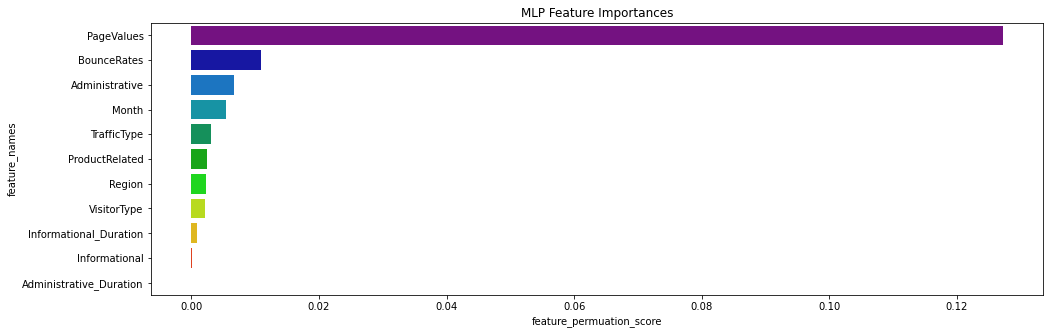

In [31]:
from sklearn.inspection import permutation_importance


# Load the data
r = permutation_importance(MLP, X_test, y_test, n_repeats=30, random_state=0)

# Plot the barchart
data_im = pd.DataFrame(r.importances_mean, columns=['feature_permuation_score'])
data_im['feature_names'] = X.columns
data_im = data_im.sort_values('feature_permuation_score', ascending=False)

fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(y=data_im['feature_names'], x="feature_permuation_score", data=data_im, palette='nipy_spectral')
ax.set_title("MLP Feature Importances")

In [36]:
import pickle

# save
with open('MLP.pkl','wb') as f:
    pickle.dump(MLP,f)

# load
with open('MLP.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [34]:
import pickle

pickle.dump(MLP, open('Flask_restful_api/model.pickle', 'wb'))
pickle.dump(scalar, open('Flask_restful_api/scaler.pickle','wb'))
pickle.dump(column_trans, open('Flask_restful_api/column_trans.pickle','wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'Flask_restful_api/model.pickle'